<h1>
     STAR UP PREDICTION (Success OR failure)
</h1>


> <h4>Preview the first few rows</h4>

In [49]:
import pandas as pd

df = pd.read_csv("/kaggle/input/startup-investments-crunchbase/investments_VC.csv", encoding="latin1", low_memory=False)  # Try 'utf-8', 'ISO-8859-1', or 'latin1'
print(df.head())  # Check if the dataset loads correctly


                         permalink                name  \
0            /organization/waywire            #waywire   
1  /organization/tv-communications  &TV Communications   
2    /organization/rock-your-paper   'Rock' Your Paper   
3   /organization/in-touch-network   (In)Touch Network   
4   /organization/r-ranch-and-mine  -R- Ranch and Mine   

                    homepage_url  \
0         http://www.waywire.com   
1          http://enjoyandtv.com   
2   http://www.rockyourpaper.org   
3  http://www.InTouchNetwork.com   
4                            NaN   

                                       category_list        market   \
0         |Entertainment|Politics|Social Media|News|          News    
1                                            |Games|         Games    
2                             |Publishing|Education|    Publishing    
3  |Electronics|Guides|Coffee|Restaurants|Music|i...   Electronics    
4                      |Tourism|Entertainment|Games|       Tourism    

   fund

In [50]:
print(df.columns)


Index(['permalink', 'name', 'homepage_url', 'category_list', ' market ',
       ' funding_total_usd ', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')


In [51]:
df.columns = df.columns.str.strip().str.lower()  # Normalize
print(df.columns)  # Check again


Index(['permalink', 'name', 'homepage_url', 'category_list', 'market',
       'funding_total_usd', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_a', 'round_b',
       'round_c', 'round_d', 'round_e', 'round_f', 'round_g', 'round_h'],
      dtype='object')


**Replace missing columns with altrnative names if available**

In [52]:

if 'total_funding_usd' not in df.columns:
    for alt in ['total_funding', 'total_funding_amount', 'total_funding_usd (usd)']:
        if alt in df.columns:
            df.rename(columns={alt: 'total_funding_usd'}, inplace=True)
            break

if 'employee_count' not in df.columns:
    for alt in ['num_employees', 'employees', 'employee_range']:
        if alt in df.columns:
            df.rename(columns={alt: 'employee_count'}, inplace=True)
            break

print(df.columns)  # Check again


Index(['permalink', 'name', 'homepage_url', 'category_list', 'market',
       'funding_total_usd', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_a', 'round_b',
       'round_c', 'round_d', 'round_e', 'round_f', 'round_g', 'round_h'],
      dtype='object')


In [53]:
df.rename(columns={'funding_total_usd': 'total_funding_usd'}, inplace=True)


In [55]:
df['total_funding_usd'] = df['total_funding_usd'].fillna(0)


In [56]:
print(df.columns)


Index(['permalink', 'name', 'homepage_url', 'category_list', 'market',
       'total_funding_usd', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_a', 'round_b',
       'round_c', 'round_d', 'round_e', 'round_f', 'round_g', 'round_h'],
      dtype='object')


In [59]:
required_columns = ['funding_rounds', 'total_funding_usd', 'employee_count', 'status']
available_columns = [col for col in required_columns if col in df.columns]
df = df.dropna(subset=available_columns)


In [62]:
features = ['funding_rounds', 'total_funding_usd']  # Remove 'employee_count'
df = df.dropna(subset=features + ['status'])


In [67]:
# Convert 'total_funding_usd' to numeric, replacing non-numeric values with NaN
df['total_funding_usd'] = pd.to_numeric(df['total_funding_usd'], errors='coerce')

# Convert 'funding_rounds' to numeric, replacing non-numeric values with NaN
df['funding_rounds'] = pd.to_numeric(df['funding_rounds'], errors='coerce')

# Fill NaN values with 0 (or use df.dropna() to remove them)
df.fillna(0, inplace=True)

# Now proceed with training


In [74]:
# Drop rows where 'status' (target variable) is missing
df = df.dropna(subset=['status'])

# Convert categorical target variable to numeric (if needed)
df['status'] = df['status'].astype(str)  # Ensure it's a string before encoding

# Now proceed with encoding and training


In [88]:
print(df['status'].isna().sum())  # Should now return 0


0


**Model training**

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Select relevant features (ensure they exist in df)
features = ['funding_rounds', 'total_funding_usd']  # Adjust based on available data

# Drop NaN values in features and target column
df = df.dropna(subset=features + ['status'])

# Encode 'status' column to numerical values
label_encoder = LabelEncoder()
df['status'] = label_encoder.fit_transform(df['status'])

# Split data into features (X) and target (y)
X = df[features]
y = df['status']

# Ensure no NaN values remain in y
if y.isna().sum() > 0:
    raise ValueError("Target variable 'y' still contains NaN values!")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")


Model Accuracy: 0.8688


**CONFUSION MATRIX & ROC CURVE**

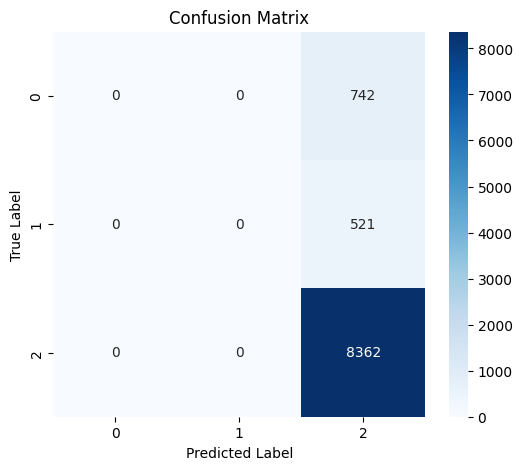

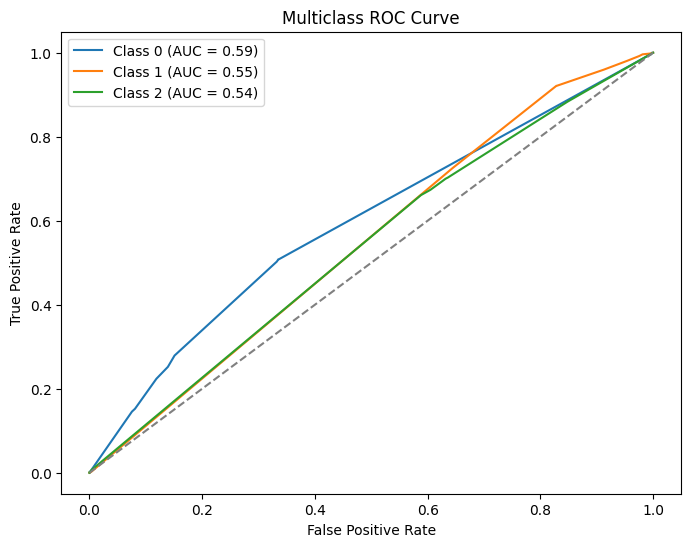

In [93]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Binarize the output for multiclass ROC
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_prob = model.predict_proba(X_test)

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Diagonal reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve")
plt.legend()
plt.show()


In [97]:
import pickle

# Save the trained model
with open("startup_model.pkl", "wb") as file:
    pickle.dump(model, file)

print("✅ Model saved successfully!")


✅ Model saved successfully!
